# Predict the critical temperature based on the features extracted using Artificial Neural Network

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

In [2]:
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

## Part 1 - Data Preprocessing

### Importing the dataset

In [3]:
dataset = pd.read_csv('train.csv')


In [4]:
dataset.head()
#

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0                   4         88.944468             57.862692   
1                   5         92.729214             58.518416   
2                   4         88.944468             57.885242   
3                   4         88.944468             57.873967   
4                   4         88.944468             57.840143   

   gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0          66.361592              36.116612             1.181795   
1          73.132787              36.396602             1.449309   
2          66.361592              36.122509             1.181795   
3          66.361592              36.119560             1.181795   
4          66.361592              36.110716             1.181795   

   wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
0                 1.062396          122.90607              31.794921   
1                 1.057755          122.90607              36.161939   
2                 0.975980          122.90607              35.741099   
3                 1.022291          122.90607              33.768010   
4                 1.129224          122.90607              27.848743   

   std_atomic_mass  ...  wtd_mean_Valence  gmean_Valence  wtd_gmean_Valence  \
0        51.968828  ...          2.257143       2.213364           2.219783   
1        47.094633  ...          2.257143       1.888175           2.210679   
2        51.968828  ...          2.271429       2.213364           2.232679   
3        51.968828  ...          2.264286       2.213364           2.226222   
4        51.968828  ...          2.242857       2.213364           2.206963   

   entropy_Valence  wtd_entropy_Valence  range_Valence  wtd_range_Valence  \
0         1.368922             1.066221              1           1.085714   
1         1.557113             1.047221              2           1.128571   
2         1.368922             1.029175              1           1.114286   
3         1.368922             1.048834              1           1.100000   
4         1.368922             1.096052              1           1.057143   

   std_Valence  wtd_std_Valence  critical_temp  
0     0.433013         0.437059           29.0  
1     0.632456         0.468606           26.0  
2     0.433013         0.444697           19.0  
3     0.433013         0.440952           22.0  
4     0.433013         0.428809           23.0  

[5 rows x 82 columns]

In [5]:
dataset.describe()

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
count        21263.000000      21263.000000          21263.000000   
mean             4.115224         87.557631             72.988310   
std              1.439295         29.676497             33.490406   
min              1.000000          6.941000              6.423452   
25%              3.000000         72.458076             52.143839   
50%              4.000000         84.922750             60.696571   
75%              5.000000        100.404410             86.103540   
max              9.000000        208.980400            208.980400   

       gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
count       21263.000000           21263.000000         21263.000000   
mean           71.290627              58.539916             1.165608   
std            31.030272              36.651067             0.364930   
min             5.320573               1.960849             0.000000   
25%            58.041225              35.248990             0.966676   
50%            66.361592              39.918385             1.199541   
75%            78.116681              73.113234             1.444537   
max           208.980400             208.980400             1.983797   

       wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
count             21263.000000       21263.000000           21263.000000   
mean                  1.063884         115.601251              33.225218   
std                   0.401423          54.626887              26.967752   
min                   0.000000           0.000000               0.000000   
25%                   0.775363          78.512902              16.824174   
50%                   1.146783         122.906070              26.636008   
75%                   1.359418         154.119320              38.356908   
max                   1.958203         207.972460             205.589910   

       std_atomic_mass  ...  wtd_mean_Valence  gmean_Valence  \
count     21263.000000  ...      21263.000000   21263.000000   
mean         44.391893  ...          3.153127       3.056536   
std          20.035430  ...          1.191249       1.046257   
min           0.000000  ...          1.000000       1.000000   
25%          32.890369  ...          2.116732       2.279705   
50%          45.123500  ...          2.618182       2.615321   
75%          59.322812  ...          4.026201       3.727919   
max         101.019700  ...          7.000000       7.000000   

       wtd_gmean_Valence  entropy_Valence  wtd_entropy_Valence  range_Valence  \
count       21263.000000     21263.000000         21263.000000   21263.000000   
mean            3.055885         1.295682             1.052841       2.041010   
std             1.174815         0.393155             0.380291       1.242345   
min             1.000000         0.000000             0.000000       0.000000   
25%             2.091251         1.060857             0.775678       1.000000   
50%             2.434057         1.368922             1.166532       2.000000   
75%             3.914868         1.589027             1.330801       3.000000   
max             7.000000         2.141963             1.949739       6.000000   

       wtd_range_Valence   std_Valence  wtd_std_Valence  critical_temp  
count       21263.000000  21263.000000     21263.000000   21263.000000  
mean            1.483007      0.839342         0.673987      34.421219  
std             0.978176      0.484676         0.455580      34.254362  
min             0.000000      0.000000         0.000000       0.000210  
25%             0.921454      0.451754         0.306892       5.365000  
50%             1.063077      0.800000         0.500000      20.000000  
75%             1.918400      1.200000         1.020436      63.000000  
max             6.992200      3.000000         3.000000     185.000000  

[8 rows x 82 columns]

In [6]:
dataset.columns

Index(['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass',
       'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass',
       'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass',
       'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie',
       'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie',
       'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie',
       'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius',
       'wtd_gmean_atomic_radius', 'entropy_atomic_radius',
       'wtd_entropy_atomic_radius', 'range_atomic_radius',
       'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius',
       'mean_Density', 'wtd_mean_Density', 'gmean_Density',
       'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density',
       'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density',
       'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity',
       'gmean_

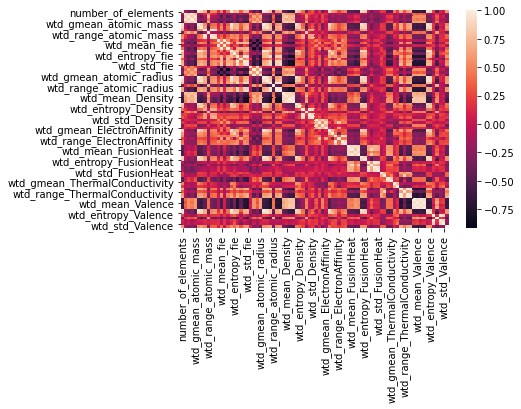

In [7]:
sns.heatmap(dataset.corr())

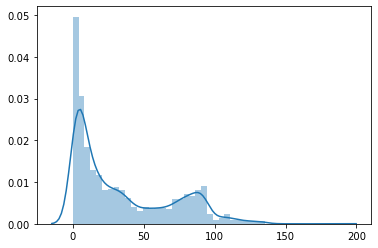

In [8]:
 sns.distplot(dataset.critical_temp.values)

### Splitting the dataset into the Training set and Test set

In [9]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Feature Scaling

In [11]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Part 2 - Building the ANN

### Initializing the ANN

In [12]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [13]:
ann.add(tf.keras.layers.Dense(units=512, activation='relu'))


In [14]:
ann.add(tf.keras.layers.Dropout(0.5))

### Adding the second hidden layer

In [15]:
ann.add(tf.keras.layers.Dense(units=256, activation='relu'))

In [16]:
ann.add(tf.keras.layers.Dropout(0.5))

### Adding third hidden layer

In [17]:
ann.add(tf.keras.layers.Dense(units=128, activation='relu'))
ann.add(tf.keras.layers.Dropout(0.5))

### Adding the output layer

In [18]:
ann.add(tf.keras.layers.Dense(units=1))

## Part 3 - Training the ANN

### Compiling the ANN

In [19]:
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Training the ANN model on the Training set

In [20]:
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1 , patience=100)
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
# fit model
history = ann.fit(X_train, y_train, validation_data = (X_test,y_test), epochs=600, batch_size = 64, verbose=1, callbacks=[es, mc])

Epoch 1/600
266/266 [==============================] - ETA: 0s - loss: 625.6582
Epoch 00001: val_loss improved from inf to 329.47464, saving model to best_model.h5
266/266 [==============================] - 1s 4ms/step - loss: 625.6582 - val_loss: 329.4746
Epoch 2/600
265/266 [============================>.] - ETA: 0s - loss: 398.8510
Epoch 00002: val_loss improved from 329.47464 to 287.84195, saving model to best_model.h5
266/266 [==============================] - 1s 3ms/step - loss: 398.3515 - val_loss: 287.8419
Epoch 3/600
263/266 [============================>.] - ETA: 0s - loss: 367.6953
Epoch 00003: val_loss improved from 287.84195 to 283.99173, saving model to best_model.h5
266/266 [==============================] - 1s 4ms/step - loss: 367.2462 - val_loss: 283.9917
Epoch 4/600
253/266 [===========================>..] - ETA: 0s - loss: 353.4792
Epoch 00004: val_loss did not improve from 283.99173
266/266 [==============================] - 1s 3ms/step - loss: 352.6732 - val_loss: 

Epoch 36/600
255/266 [===========================>..] - ETA: 0s - loss: 284.8826
Epoch 00036: val_loss did not improve from 214.23753
266/266 [==============================] - 1s 3ms/step - loss: 286.1156 - val_loss: 219.0517
Epoch 37/600
263/266 [============================>.] - ETA: 0s - loss: 289.5299
Epoch 00037: val_loss did not improve from 214.23753
266/266 [==============================] - 1s 3ms/step - loss: 288.4616 - val_loss: 222.5519
Epoch 38/600
265/266 [============================>.] - ETA: 0s - loss: 287.3416
Epoch 00038: val_loss did not improve from 214.23753
266/266 [==============================] - 1s 3ms/step - loss: 287.8714 - val_loss: 222.1962
Epoch 39/600
256/266 [===========================>..] - ETA: 0s - loss: 292.3105
Epoch 00039: val_loss did not improve from 214.23753
266/266 [==============================] - 1s 3ms/step - loss: 293.7322 - val_loss: 215.4783
Epoch 40/600
265/266 [============================>.] - ETA: 0s - loss: 289.1338
Epoch 00040

255/266 [===========================>..] - ETA: 0s - loss: 272.6304
Epoch 00071: val_loss did not improve from 198.95595
266/266 [==============================] - 1s 3ms/step - loss: 273.8913 - val_loss: 198.9908
Epoch 72/600
262/266 [============================>.] - ETA: 0s - loss: 268.3961
Epoch 00072: val_loss did not improve from 198.95595
266/266 [==============================] - 1s 3ms/step - loss: 268.7713 - val_loss: 206.1442
Epoch 73/600
255/266 [===========================>..] - ETA: 0s - loss: 269.4209
Epoch 00073: val_loss did not improve from 198.95595
266/266 [==============================] - 1s 3ms/step - loss: 270.9944 - val_loss: 201.6687
Epoch 74/600
250/266 [===========================>..] - ETA: 0s - loss: 270.5457
Epoch 00074: val_loss did not improve from 198.95595
266/266 [==============================] - 1s 3ms/step - loss: 272.5626 - val_loss: 223.6642
Epoch 75/600
245/266 [==========================>...] - ETA: 0s - loss: 272.9657
Epoch 00075: val_loss di

Epoch 107/600
259/266 [============================>.] - ETA: 0s - loss: 258.8120
Epoch 00107: val_loss did not improve from 188.09256
266/266 [==============================] - 1s 3ms/step - loss: 259.5283 - val_loss: 190.7812
Epoch 108/600
254/266 [===========================>..] - ETA: 0s - loss: 258.2321
Epoch 00108: val_loss did not improve from 188.09256
266/266 [==============================] - 1s 3ms/step - loss: 258.5277 - val_loss: 191.0996
Epoch 109/600
252/266 [===========================>..] - ETA: 0s - loss: 263.2273
Epoch 00109: val_loss did not improve from 188.09256
266/266 [==============================] - 1s 4ms/step - loss: 263.7267 - val_loss: 192.2091
Epoch 110/600
248/266 [==========================>...] - ETA: 0s - loss: 262.1638
Epoch 00110: val_loss did not improve from 188.09256
266/266 [==============================] - 1s 4ms/step - loss: 261.3195 - val_loss: 194.5208
Epoch 111/600
255/266 [===========================>..] - ETA: 0s - loss: 259.1132
Epoch 

Epoch 143/600
257/266 [===========================>..] - ETA: 0s - loss: 250.1512
Epoch 00143: val_loss did not improve from 183.64468
266/266 [==============================] - 1s 4ms/step - loss: 250.8443 - val_loss: 190.7913
Epoch 144/600
262/266 [============================>.] - ETA: 0s - loss: 250.0801
Epoch 00144: val_loss did not improve from 183.64468
266/266 [==============================] - 1s 4ms/step - loss: 250.7003 - val_loss: 194.8309
Epoch 145/600
254/266 [===========================>..] - ETA: 0s - loss: 252.9175
Epoch 00145: val_loss did not improve from 183.64468
266/266 [==============================] - 1s 4ms/step - loss: 251.0098 - val_loss: 186.5614
Epoch 146/600
257/266 [===========================>..] - ETA: 0s - loss: 251.1002
Epoch 00146: val_loss did not improve from 183.64468
266/266 [==============================] - 1s 4ms/step - loss: 251.7281 - val_loss: 192.0576
Epoch 147/600
252/266 [===========================>..] - ETA: 0s - loss: 248.9955
Epoch 

Epoch 179/600
260/266 [============================>.] - ETA: 0s - loss: 246.1351
Epoch 00179: val_loss did not improve from 180.84529
266/266 [==============================] - 1s 4ms/step - loss: 245.7366 - val_loss: 189.4064
Epoch 180/600
265/266 [============================>.] - ETA: 0s - loss: 243.1435
Epoch 00180: val_loss did not improve from 180.84529
266/266 [==============================] - 1s 4ms/step - loss: 243.2294 - val_loss: 187.7722
Epoch 181/600
257/266 [===========================>..] - ETA: 0s - loss: 240.1174
Epoch 00181: val_loss did not improve from 180.84529
266/266 [==============================] - 1s 4ms/step - loss: 240.3554 - val_loss: 189.7653
Epoch 182/600
260/266 [============================>.] - ETA: 0s - loss: 245.0980
Epoch 00182: val_loss did not improve from 180.84529
266/266 [==============================] - 1s 4ms/step - loss: 246.0003 - val_loss: 197.9654
Epoch 183/600
261/266 [============================>.] - ETA: 0s - loss: 240.2879
Epoch 

Epoch 215/600
250/266 [===========================>..] - ETA: 0s - loss: 239.2210
Epoch 00215: val_loss did not improve from 177.71068
266/266 [==============================] - 1s 4ms/step - loss: 237.8230 - val_loss: 192.0691
Epoch 216/600
261/266 [============================>.] - ETA: 0s - loss: 240.0078
Epoch 00216: val_loss did not improve from 177.71068
266/266 [==============================] - 1s 4ms/step - loss: 240.2048 - val_loss: 185.1044
Epoch 217/600
253/266 [===========================>..] - ETA: 0s - loss: 237.4473
Epoch 00217: val_loss did not improve from 177.71068
266/266 [==============================] - 1s 4ms/step - loss: 237.4794 - val_loss: 180.8427
Epoch 218/600
264/266 [============================>.] - ETA: 0s - loss: 241.0464
Epoch 00218: val_loss did not improve from 177.71068
266/266 [==============================] - 1s 4ms/step - loss: 240.9697 - val_loss: 190.6888
Epoch 219/600
252/266 [===========================>..] - ETA: 0s - loss: 239.1843
Epoch 

Epoch 251/600
265/266 [============================>.] - ETA: 0s - loss: 234.6127
Epoch 00251: val_loss did not improve from 177.71068
266/266 [==============================] - 1s 4ms/step - loss: 234.6697 - val_loss: 197.2598
Epoch 252/600
257/266 [===========================>..] - ETA: 0s - loss: 243.0077
Epoch 00252: val_loss did not improve from 177.71068
266/266 [==============================] - 1s 4ms/step - loss: 243.1438 - val_loss: 188.3738
Epoch 253/600
254/266 [===========================>..] - ETA: 0s - loss: 235.6523
Epoch 00253: val_loss did not improve from 177.71068
266/266 [==============================] - 1s 4ms/step - loss: 236.5042 - val_loss: 203.5739
Epoch 254/600
263/266 [============================>.] - ETA: 0s - loss: 238.3013
Epoch 00254: val_loss did not improve from 177.71068
266/266 [==============================] - 1s 4ms/step - loss: 239.0479 - val_loss: 202.1377
Epoch 255/600
264/266 [============================>.] - ETA: 0s - loss: 243.8899
Epoch 

Epoch 287/600
257/266 [===========================>..] - ETA: 0s - loss: 234.0584
Epoch 00287: val_loss did not improve from 176.10092
266/266 [==============================] - 1s 4ms/step - loss: 235.0716 - val_loss: 203.6204
Epoch 288/600
254/266 [===========================>..] - ETA: 0s - loss: 236.5404
Epoch 00288: val_loss did not improve from 176.10092
266/266 [==============================] - 1s 4ms/step - loss: 234.7327 - val_loss: 179.1341
Epoch 289/600
254/266 [===========================>..] - ETA: 0s - loss: 229.8931
Epoch 00289: val_loss did not improve from 176.10092
266/266 [==============================] - 1s 4ms/step - loss: 230.0280 - val_loss: 181.1818
Epoch 290/600
258/266 [============================>.] - ETA: 0s - loss: 235.1931
Epoch 00290: val_loss did not improve from 176.10092
266/266 [==============================] - 1s 4ms/step - loss: 234.0456 - val_loss: 179.6238
Epoch 291/600
258/266 [============================>.] - ETA: 0s - loss: 229.2062
Epoch 

Epoch 323/600
261/266 [============================>.] - ETA: 0s - loss: 224.7124
Epoch 00323: val_loss did not improve from 176.10092
266/266 [==============================] - 1s 4ms/step - loss: 224.2707 - val_loss: 188.4960
Epoch 324/600
252/266 [===========================>..] - ETA: 0s - loss: 224.2217
Epoch 00324: val_loss did not improve from 176.10092
266/266 [==============================] - 1s 4ms/step - loss: 224.6417 - val_loss: 196.8099
Epoch 325/600
260/266 [============================>.] - ETA: 0s - loss: 231.1071
Epoch 00325: val_loss did not improve from 176.10092
266/266 [==============================] - 1s 4ms/step - loss: 230.2499 - val_loss: 185.7922
Epoch 326/600
262/266 [============================>.] - ETA: 0s - loss: 218.0455
Epoch 00326: val_loss did not improve from 176.10092
266/266 [==============================] - 1s 4ms/step - loss: 219.3819 - val_loss: 185.4864
Epoch 327/600
265/266 [============================>.] - ETA: 0s - loss: 225.1332
Epoch 

Epoch 359/600
252/266 [===========================>..] - ETA: 0s - loss: 220.9047
Epoch 00359: val_loss did not improve from 176.10092
266/266 [==============================] - 1s 4ms/step - loss: 221.4764 - val_loss: 183.3930
Epoch 360/600
261/266 [============================>.] - ETA: 0s - loss: 218.0911
Epoch 00360: val_loss did not improve from 176.10092
266/266 [==============================] - 1s 4ms/step - loss: 219.1320 - val_loss: 195.0538
Epoch 361/600
254/266 [===========================>..] - ETA: 0s - loss: 222.8149
Epoch 00361: val_loss did not improve from 176.10092
266/266 [==============================] - 1s 4ms/step - loss: 222.0464 - val_loss: 195.4254
Epoch 362/600
256/266 [===========================>..] - ETA: 0s - loss: 225.0885
Epoch 00362: val_loss did not improve from 176.10092
266/266 [==============================] - 1s 4ms/step - loss: 225.2118 - val_loss: 185.7218
Epoch 363/600
261/266 [============================>.] - ETA: 0s - loss: 221.2326
Epoch 

Epoch 395/600
256/266 [===========================>..] - ETA: 0s - loss: 221.7036
Epoch 00395: val_loss did not improve from 175.40506
266/266 [==============================] - 1s 4ms/step - loss: 222.0268 - val_loss: 191.0793
Epoch 396/600
261/266 [============================>.] - ETA: 0s - loss: 223.1656
Epoch 00396: val_loss did not improve from 175.40506
266/266 [==============================] - 1s 4ms/step - loss: 222.5813 - val_loss: 183.1389
Epoch 397/600
252/266 [===========================>..] - ETA: 0s - loss: 217.4564
Epoch 00397: val_loss did not improve from 175.40506
266/266 [==============================] - 1s 4ms/step - loss: 218.3097 - val_loss: 188.3989
Epoch 398/600
257/266 [===========================>..] - ETA: 0s - loss: 220.4434
Epoch 00398: val_loss did not improve from 175.40506
266/266 [==============================] - 1s 4ms/step - loss: 220.3847 - val_loss: 189.3235
Epoch 399/600
263/266 [============================>.] - ETA: 0s - loss: 221.6801
Epoch 

Epoch 431/600
261/266 [============================>.] - ETA: 0s - loss: 215.4185
Epoch 00431: val_loss did not improve from 172.59171
266/266 [==============================] - 1s 4ms/step - loss: 214.9769 - val_loss: 175.6006
Epoch 432/600
265/266 [============================>.] - ETA: 0s - loss: 218.2444
Epoch 00432: val_loss did not improve from 172.59171
266/266 [==============================] - 1s 4ms/step - loss: 218.2818 - val_loss: 188.9032
Epoch 433/600
266/266 [==============================] - ETA: 0s - loss: 220.0097
Epoch 00433: val_loss did not improve from 172.59171
266/266 [==============================] - 1s 4ms/step - loss: 220.0097 - val_loss: 174.8026
Epoch 434/600
256/266 [===========================>..] - ETA: 0s - loss: 216.4728
Epoch 00434: val_loss did not improve from 172.59171
266/266 [==============================] - 1s 4ms/step - loss: 216.4692 - val_loss: 180.4406
Epoch 435/600
254/266 [===========================>..] - ETA: 0s - loss: 220.1763
Epoch 

Epoch 467/600
263/266 [============================>.] - ETA: 0s - loss: 211.5403
Epoch 00467: val_loss did not improve from 167.87567
266/266 [==============================] - 1s 4ms/step - loss: 211.2897 - val_loss: 180.3145
Epoch 468/600
256/266 [===========================>..] - ETA: 0s - loss: 217.7506
Epoch 00468: val_loss did not improve from 167.87567
266/266 [==============================] - 1s 4ms/step - loss: 217.5816 - val_loss: 190.4590
Epoch 469/600
261/266 [============================>.] - ETA: 0s - loss: 213.4010
Epoch 00469: val_loss did not improve from 167.87567
266/266 [==============================] - 1s 4ms/step - loss: 212.9662 - val_loss: 192.5954
Epoch 470/600
259/266 [============================>.] - ETA: 0s - loss: 222.2039
Epoch 00470: val_loss did not improve from 167.87567
266/266 [==============================] - 1s 4ms/step - loss: 223.0099 - val_loss: 170.8889
Epoch 471/600
265/266 [============================>.] - ETA: 0s - loss: 213.9059
Epoch 

Epoch 503/600
262/266 [============================>.] - ETA: 0s - loss: 215.8242
Epoch 00503: val_loss did not improve from 167.87567
266/266 [==============================] - 1s 4ms/step - loss: 216.1940 - val_loss: 213.5542
Epoch 504/600
254/266 [===========================>..] - ETA: 0s - loss: 213.2046
Epoch 00504: val_loss did not improve from 167.87567
266/266 [==============================] - 1s 4ms/step - loss: 213.9562 - val_loss: 179.0002
Epoch 505/600
255/266 [===========================>..] - ETA: 0s - loss: 207.3211
Epoch 00505: val_loss did not improve from 167.87567
266/266 [==============================] - 1s 4ms/step - loss: 206.9213 - val_loss: 174.0318
Epoch 506/600
256/266 [===========================>..] - ETA: 0s - loss: 210.4281
Epoch 00506: val_loss did not improve from 167.87567
266/266 [==============================] - 1s 4ms/step - loss: 211.8613 - val_loss: 176.6458
Epoch 507/600
253/266 [===========================>..] - ETA: 0s - loss: 210.6710
Epoch 

Epoch 539/600
261/266 [============================>.] - ETA: 0s - loss: 211.4478
Epoch 00539: val_loss did not improve from 167.87567
266/266 [==============================] - 1s 4ms/step - loss: 211.4706 - val_loss: 188.1446
Epoch 540/600
252/266 [===========================>..] - ETA: 0s - loss: 212.1104
Epoch 00540: val_loss did not improve from 167.87567
266/266 [==============================] - 1s 4ms/step - loss: 211.8316 - val_loss: 176.2998
Epoch 541/600
266/266 [==============================] - ETA: 0s - loss: 213.8497
Epoch 00541: val_loss did not improve from 167.87567
266/266 [==============================] - 1s 4ms/step - loss: 213.8497 - val_loss: 178.3617
Epoch 542/600
253/266 [===========================>..] - ETA: 0s - loss: 210.4398
Epoch 00542: val_loss did not improve from 167.87567
266/266 [==============================] - 1s 4ms/step - loss: 212.3386 - val_loss: 186.7587
Epoch 543/600
262/266 [============================>.] - ETA: 0s - loss: 208.4346
Epoch 

In [21]:
# load the saved model
saved_model = load_model('best_model.h5')

train_loss = saved_model.evaluate(X_train, y_train, verbose=0)
test_loss = saved_model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_loss, test_loss))

Train: 166.884, Test: 167.876


### Predicting the results of the Test set

In [22]:
y_pred = ann.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 8.02  6.4 ]
 [75.34 91.2 ]
 [42.82 38.  ]
 ...
 [ 5.19  3.5 ]
 [ 8.64  8.7 ]
 [ 4.84  2.15]]


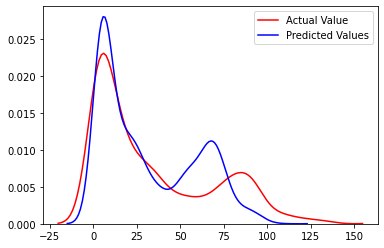

In [23]:
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Predicted Values" , ax=ax1)

Text(0, 0.5, 'Predicted Critical Temperature (K)')

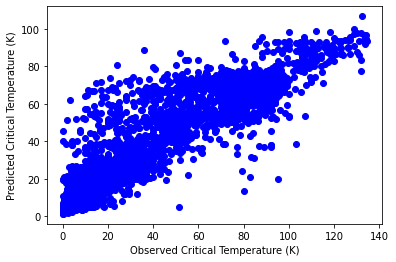

In [24]:
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Observed Critical Temperature (K)')
plt.ylabel('Predicted Critical Temperature (K)')

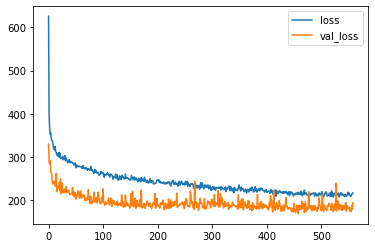

In [25]:
loss_function = pd.DataFrame(history.history)
loss_function.plot()

In [26]:
np.sqrt(loss_function['loss'])

0      25.013161
1      19.958746
2      19.163670
3      18.779594
4      18.852139
         ...    
554    14.440630
555    14.473972
556    14.620290
557    14.650217
558    14.720962
Name: loss, Length: 559, dtype: float64

In [27]:
np.sqrt(loss_function['val_loss'])

0      18.151436
1      16.965906
2      16.852054
3      17.078044
4      16.281397
         ...    
554    13.320017
555    13.162545
556    13.699031
557    13.382353
558    13.924051
Name: val_loss, Length: 559, dtype: float64